In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

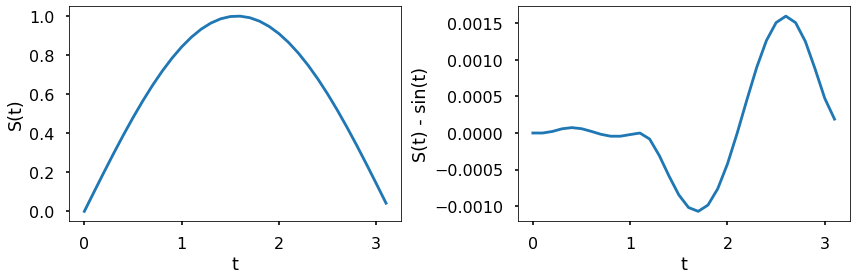

In [2]:
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

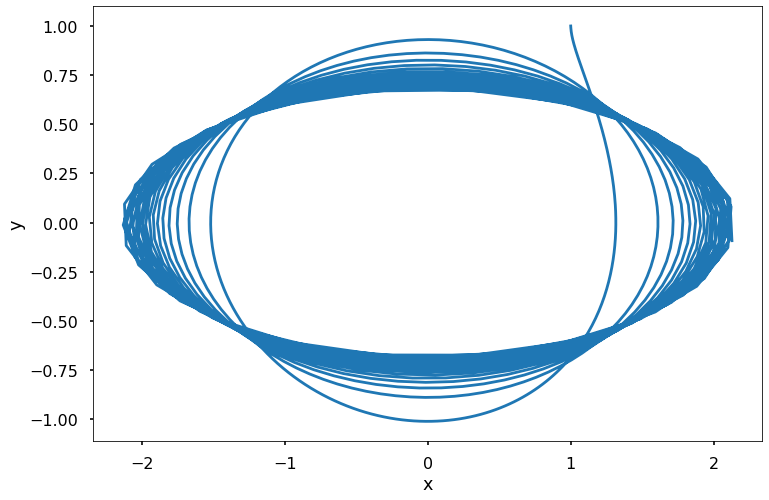

In [3]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
def sys_ode(t,u):
    du = [0]*4
    du[0] = u[2]
    du[1] = u[3]
    du[2] = -k0*np.sqrt(u[2]**2 + u[3]**2)*u[2]/m
    du[3] = -g-k0*np.sqrt(u[2]**2 + u[3]**2)*u[3]/m
    return du

In [23]:
#main constants 
g = 9.8
m = 0.05

#initial position
x0 = 0
y0 = 1.5
v0 = 1.6
k0 = 0.03

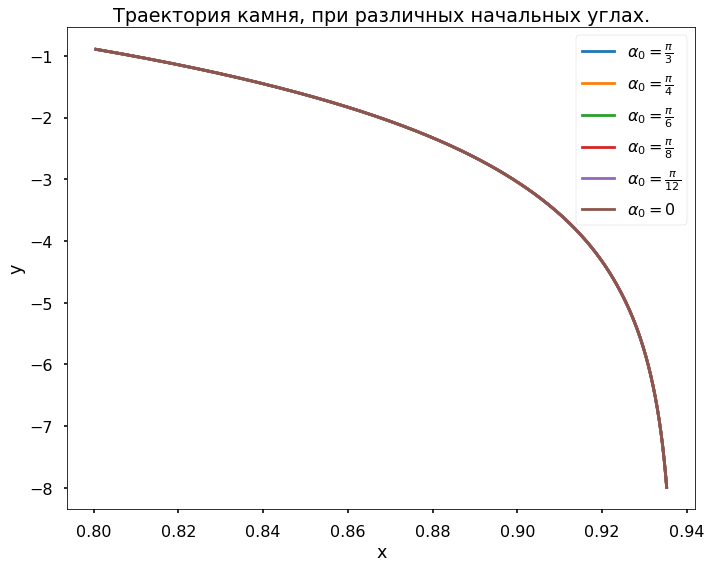

In [33]:
results = []
angles = [np.pi/3,np.pi/4,np.pi/6,np.pi/8,np.pi/12,0]
labels = [r'$\frac{\pi}{3}$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{6}$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{12}$',r'$0$']
plt.figure(figsize=(10,8))

for i, alpha in enumerate(angles):
    # initial conditions
    t0 = 0 #initial time
    alpha = 0 #initial angle 
    u0 = [x0, y0, v0*np.cos(alpha), v0*np.sin(alpha)]

    T = 10
    N = 2048

    # interval fragmentation for numeric computation
    t = np.linspace(t0,T, N)

    #Solve ODE with initial conditions
    sol = solve_ivp(sys_ode, [t0, T], u0, t_eval=t)
    
    # Save the solution in @results
    results.append(sol.y.T)
    x = sol.y.T[:,0]
    y = sol.y.T[:,1]
    
    draw_set = np.logical_and(x>0.8,y>-8)
    
    plt.plot(x[draw_set],y[draw_set],label=r'$\alpha_0 = $'+labels[i])
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Траектория камня, при различных начальных углах.")

plt.tight_layout()

#plt.savefig("question 1.png",dpi=300)
plt.show()